# Ananke

This notebook is based on the example notebook in py-ananke's repository "https://github.com/athob/py-ananke/tree/main"


In [1]:
import ananke

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import h5py

In [5]:
from astropy import coordinates as ac
from astropy import units as u

In [6]:
idx_f = 178

In [7]:
snapname = f"/astro/dboyea/sculptor/orbits/orbit1/1e6_V32_r5.4/out/snapshot_{idx_f - 1}.hdf5"

In [8]:
starsname = "/astro/dboyea/sculptor/isolation/1e6/fiducial/ana_stars/exp2d_rs0.10_stars.hdf5"

In [9]:
with h5py.File(snapname) as h5f:
    pos = np.array(h5f["PartType1/Coordinates"])
    vel = np.array(h5f["PartType1/Velocities"])
    index =  np.array(h5f["PartType1/ParticleIDs"])

In [10]:
with h5py.File(starsname) as h5f:
    stars_index = np.array(h5f["index"])
    probabilities = np.array(h5f["probability"])
stars_index, probabilities

(array([      1,       2,       3, ...,  999998,  999999, 1000000]),
 array([2.22934815e-251, 0.00000000e+000, 0.00000000e+000, ...,
        4.10473853e-152, 4.17184933e-020, 3.90043577e-122]))

In [11]:
def invperm(a):
    b = np.arange(a.shape[0])
    b[a] = b.copy()
    return b

In [12]:
mtot = 5e6
mstar = probabilities[invperm(np.argsort(index))] * mtot

In [13]:
stars_index[invperm(np.argsort(index))] == index

array([ True,  True,  True, ...,  True,  True,  True])

In [14]:
sum(mstar)

4999999.999999488

In [15]:
N = len(mstar)
V0 = 207.4

sim_input = {
    "pos3": pos,
    "vel3": vel * V0,
    "mass": mstar,
    "age": np.random.normal(9.8, 0.1, N),
    "feh": np.random.normal(-2.3, 0.25, N),
    "parentid": index,
    
}

In [16]:
vel.shape

(1000000, 3)

In [17]:
sim_input

{'pos3': array([[ -5.2127695 , -12.5378    , -78.9448    ],
        [ -5.1854053 , -12.550253  , -78.97125   ],
        [ -5.278691  , -12.517465  , -78.92486   ],
        ...,
        [ 61.682835  ,   0.82146645, 109.0447    ],
        [ 61.751995  ,   0.11749478, 105.75171   ],
        [ 59.891254  ,   2.4718196 , 105.56893   ]], dtype=float32),
 'vel3': array([[   7.480167,  150.54129 , -132.79074 ],
        [  10.748213,  141.43848 ,  -91.20764 ],
        [  27.622059,  149.05194 ,  -92.24296 ],
        ...,
        [  60.32314 ,  -12.842017,  157.33994 ],
        [ -84.50634 , -112.07396 ,  120.116684],
        [  67.69617 ,  -14.088097,  161.60738 ]], dtype=float32),
 'mass': array([3.71668342e-14, 1.49032118e+00, 3.69007733e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 'age': array([9.78034157, 9.76257921, 9.62594311, ..., 9.78358049, 9.67576519,
        9.82246037]),
 'feh': array([-2.2722823 , -2.1663414 , -2.55039243, ..., -2.1032869 ,
        -2.229942

In [18]:
idxs = np.random.choice(N, p=mstar/np.sum(mstar), size=10000)

In [19]:
gcs = ac.Galactocentric(x=pos[idxs, 0]*u.kpc, y=pos[idxs, 1]*u.kpc, z=pos[idxs, 2]*u.kpc);

In [20]:
icrs = gcs.transform_to(ac.ICRS())

In [21]:
V0 = 207 # km/s

In [22]:
an.display_available_photometric_systems()

NameError: name 'an' is not defined

In [23]:
help(ananke.Ananke)

Help on class Ananke in module ananke.Ananke:

class Ananke(builtins.object)
 |  Ananke(particles: Dict[str, numpy.ndarray[Any, numpy.dtype[+_ScalarType_co]]], name: str, ngb: int = 64, d_params: Dict[str, Any] = {}, e_params: Dict[str, Any] = {}, err_params: Dict[str, Any] = {}, **kwargs: Dict[str, Any]) -> None
 |  
 |  Represents a single ananke pipeline.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, particles: Dict[str, numpy.ndarray[Any, numpy.dtype[+_ScalarType_co]]], name: str, ngb: int = 64, d_params: Dict[str, Any] = {}, e_params: Dict[str, Any] = {}, err_params: Dict[str, Any] = {}, **kwargs: Dict[str, Any]) -> None
 |      Parameters
 |      ----------
 |      particles : dict
 |          A dictionary of same-length arrays representing particles
 |          data of a stellar population - see notes for formatting
 |      
 |      name : str
 |          Name for the pipeline
 |      
 |      ngb : int
 |          Number of neighbours to use in kernel density estimatio

In [24]:
# matches my GC coordinate definition
observer = {
    "pos3": [8.122, 0, 0.0208],
    "vel3": [ 12.9, 245.6, 7.78],
}

rshell = [0, 1000]

fsample = 1

photo_sys = 'padova/GAIA__DR2'

cmd_magnames = {'magnitude': 'G',
                'color_minuend': 'Gbp',
                'color_subtrahend': 'Grp'}

cmd_box = {
           'abs_mag_lim_lo': -1000,
           'abs_mag_lim_hi': 1000,
        #    'app_mag_lim_lo' : -1000,
           'app_mag_lim_hi': 30,
        #    'color_lim_lo' : -1000,
        #    'color_lim_hi' : 1000
           }

In [25]:
name = "fiducial"

an = ananke.Ananke(sim_input, name, 
    fsample=fsample, observe=observer, rshell=rshell, photo_sys=photo_sys, cmd_magnames=cmd_magnames, **cmd_box)


/astro/dboyea/.local/lib/python3.9/site-packages/ananke/utils.py:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._record_of_all_used_keys = set()
/astro/dboyea/.local/lib/python3.9/site-packages/ananke/utils.py:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._record_of_all_used_keys = set()


In [26]:
survey = an.run()

Dimensions = 3
Normalization constant of Kernel type 3: 0.596831
Reading ASCII format file: to_enbid 
Read 3000000 records
Allocated 38.147 MByte for particle storage.
Type = 1 Particles = 1000000
Total particles = 1000000
Allocated 221.252 MByte for Binary-Tree and Entropy bins.

Scaling Co-ordinates as x[i]=x[i]/h[i] with h[i]->
1 1 1 

Starting to Build Tree .......
Particle Type = 1 First node number = 1
                  Last node number  = 1999999
Total number of nodes = 1999999
Treebuild time = 1.94171 s 

Density Calculation. Smoothing .....
Evaluated =   1 % Time Left = 10.929490 s of 11.039900 s Par no = 802239 Density = 1.715021e+00 
Evaluated =   2 % Time Left = 11.750041 s of 11.989850 s Par no = 301024 Density = 1.411257e+00 
Evaluated =   3 % Time Left = 11.997142 s of 12.368200 s Par no = 614020 Density = 8.121975e-01 
Evaluated =   4 % Time Left = 12.040019 s of 12.541700 s Par no = 371155 Density = 1.804440e+00 
Evaluated =   5 % Time Left = 11.741551 s of 12.359540 s

/astro/dboyea/.local/lib/python3.9/site-packages/EnBiD_ananke/__init__.py:237: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  usedvals = pd.read_table(path / CONSTANTS.usedvalues, header=None, delim_whitespace=True,


Dimensions = 3
Normalization constant of Kernel type 3: 0.596831
Reading ASCII format file: to_enbid 
Read 3000000 records
Allocated 38.147 MByte for particle storage.
Type = 1 Particles = 1000000
Total particles = 1000000
Allocated 221.252 MByte for Binary-Tree and Entropy bins.

Scaling Co-ordinates as x[i]=x[i]/h[i] with h[i]->
1 1 1 

Starting to Build Tree .......
Particle Type = 1 First node number = 1
                  Last node number  = 1999999
Total number of nodes = 1999999
Treebuild time = 2.23312 s 

Density Calculation. Smoothing .....
Evaluated =   1 % Time Left = 12.352218 s of 12.477000 s Par no = 745305 Density = 3.383488e-01 
Evaluated =   2 % Time Left = 12.580002 s of 12.836750 s Par no = 603675 Density = 1.960398e-01 
Evaluated =   3 % Time Left = 12.699486 s of 13.092267 s Par no = 727475 Density = 1.830237e-01 
Evaluated =   4 % Time Left = 12.533867 s of 13.056125 s Par no = 355743 Density = 6.991402e-02 
Evaluated =   5 % Time Left = 12.287648 s of 12.934380 s

/astro/dboyea/.local/lib/python3.9/site-packages/EnBiD_ananke/__init__.py:237: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  usedvals = pd.read_table(path / CONSTANTS.usedvalues, header=None, delim_whitespace=True,


Executing JOB 1/1 = /arc7/home/dboyea/.local/.cache/Galaxia_ananke/bin/galaxia -r --hdim=6 --nfile=fiducial --ngen=0 /arc7/home/dboyea/dwarfs/notebooks/survey_params
JOB 1/1 | CODEDATAPATH=/arc7/home/dboyea/.local/.cache/Galaxia_ananke/GalaxiaData/
JOB 1/1 | Reading Parameter file-             /arc7/home/dboyea/dwarfs/notebooks/survey_params
JOB 1/1 | --------------------------------------------------------
JOB 1/1 | outputFile               survey                  
JOB 1/1 | outputDir                /arc7/home/dboyea/dwarfs/notebooks
JOB 1/1 | photoCateg               padova                  
JOB 1/1 | photoSys                 GAIA__DR2               
JOB 1/1 | magcolorNames            G,Gbp-Grp               
JOB 1/1 | appMagLimits[0]          -1000                   
JOB 1/1 | appMagLimits[1]          30                      
JOB 1/1 | absMagLimits[0]          -1000                   
JOB 1/1 | absMagLimits[1]          1000                    
JOB 1/1 | colorLimits[0]           -100

/astro/dboyea/.local/lib/python3.9/site-packages/ananke/utils.py:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._record_of_all_used_keys = set()


Exported the following quantities to /arc7/home/dboyea/dwarfs/notebooks/survey.fiducial.0.h5
['pi_Sig', 'vr_Sig', 'gaia__dr2_gbp_Err', 'dec_Sig', 'gaia__dr2_g_Err', 'gaia__dr2_g_Sig', 'mura_Sig', 'mudec_Sig', 'ra_Sig', 'gaia__dr2_grp_Sig', 'mura_Err', 'mudec_Err', 'gaia__dr2_grp_Err', 'dec_Err', 'gaia__dr2_gbp_Sig', 'vr_Err', 'ra_Err', 'pi_Err']
Overwritten the following quantities to /arc7/home/dboyea/dwarfs/notebooks/survey.fiducial.0.h5
('vr', 'gaia__dr2_g', 'dec', 'mura', 'mudec', 'ra', 'gaia__dr2_gbp', 'pi', 'gaia__dr2_grp')
Running convert_icrs_to_galactic post-processing pipeline
Overwritten the following quantities to /arc7/home/dboyea/dwarfs/notebooks/survey.fiducial.0.h5
('glon', 'glat', 'mul', 'mub')


In [27]:
survey

#,age,dec,dec_Err,dec_Sig,dform,dmod,feh,gaia__dr2_g,gaia__dr2_g_Err,gaia__dr2_g_Intrinsic,gaia__dr2_g_Sig,gaia__dr2_gbp,gaia__dr2_gbp_Err,gaia__dr2_gbp_Intrinsic,gaia__dr2_gbp_Sig,gaia__dr2_grp,gaia__dr2_grp_Err,gaia__dr2_grp_Intrinsic,gaia__dr2_grp_Sig,glat,glon,grav,lum,mact,mtip,mub,mudec,mudec_Err,mudec_Sig,mul,mura,mura_Err,mura_Sig,parentid,partid,partitionid,pi,pi_Err,pi_Sig,px,py,pz,ra,ra_Err,ra_Sig,rad,smass,teff,vr,vr_Err,vr_Sig,vx,vy,vz
0,9.762578964233398,nan,nan,nan,0.0,19.51644642585769,-2.1663413047790527,nan,nan,8.6709795,nan,nan,nan,9.261134,nan,nan,nan,7.950298,nan,nan,nan,5.0096273,0.030620849,0.32808596,0.9974454,nan,nan,nan,nan,nan,nan,nan,nan,909254,0,0,nan,nan,nan,2.9365681117429343,-12.550252914413981,-78.99205244143673,nan,nan,nan,80.03672050628606,0.32855387462116037,4441.2603,nan,nan,nan,-2.1517871856689457,-104.1615234375,-98.9876416015625
1,9.762578964233398,nan,nan,nan,0.0,19.517413684910363,-2.1663413047790527,nan,nan,8.821811,nan,nan,nan,9.422317,nan,nan,nan,8.093195,nan,nan,nan,5.0233417,0.026896091,0.30698785,0.9974454,nan,nan,nan,nan,nan,nan,nan,nan,909254,1,0,nan,nan,nan,2.925930885982907,-12.540372495493637,-79.03014624919015,nan,nan,nan,80.07237994492026,0.3072507778410628,4406.2046,nan,nan,nan,-2.07983336133771,-103.75636063810033,-99.4746126241907
2,9.625943183898926,nan,nan,nan,0.0,19.514972803181852,-2.5503923892974854,nan,nan,9.205651,nan,nan,nan,9.831517,nan,nan,nan,8.460739,nan,nan,nan,5.0688934,0.019269567,0.26268655,1.106668,nan,nan,nan,nan,nan,nan,nan,nan,439699,0,0,nan,nan,nan,2.843282551135024,-12.517464637741618,-78.9456580932922,nan,nan,nan,79.98242374675634,0.2628418622395412,4329.7534,nan,nan,nan,14.722058868408203,-96.54805908203124,-100.02295806884766
3,9.625943183898926,nan,nan,nan,0.0,19.514273549326823,-2.5503923892974854,nan,nan,9.753855,nan,nan,nan,10.414948,nan,nan,nan,8.984487,nan,nan,nan,5.1333246,0.012003309,0.20837331,1.106668,nan,nan,nan,nan,nan,nan,nan,nan,439699,1,0,nan,nan,nan,2.877118740641792,-12.455641111206917,-78.92812302227135,nan,nan,nan,79.95667208906171,0.20938450643758486,4223.5493,nan,nan,nan,14.976365983704452,-96.75317229839779,-100.02816251247532
4,9.625943183898926,nan,nan,nan,0.0,19.514915231876135,-2.5503923892974854,nan,nan,5.440907,nan,nan,nan,5.692287,nan,nan,nan,5.01149,nan,nan,nan,4.6514554,0.5362987,0.73350686,1.106668,nan,nan,nan,nan,nan,nan,nan,nan,439699,1,0,nan,nan,nan,2.850339029538103,-12.521712254388333,-78.94258163557348,nan,nan,nan,79.98030323557288,0.7334693877625195,6044.9316,nan,nan,nan,14.721925092968618,-96.5870126869185,-100.39724962907667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,657,017",9.73058032989502,nan,nan,nan,0.0,19.209207071200012,-1.7533900737762451,nan,nan,8.854943,nan,nan,nan,9.488313,nan,nan,nan,8.10383,nan,nan,nan,5.0075636,0.026899561,0.3233883,1.034234,nan,nan,nan,nan,nan,nan,nan,nan,790326,0,0,nan,nan,nan,3.7612946933164206,4.2000989914087725,-69.24791181643673,nan,nan,nan,69.47705707817941,0.3233883443037295,4312.1,nan,nan,nan,11.011676406860351,-74.22725830078124,-47.02109268188477
"4,657,018",9.712577819824219,nan,nan,nan,0.0,19.228314853853398,-2.3385210037231445,nan,nan,7.9408765,nan,nan,nan,8.469017,nan,nan,nan,7.2655215,nan,nan,nan,4.9430685,0.057359546,0.43783706,1.0320942,nan,nan,nan,nan,nan,nan,nan,nan,94677,0,0,nan,nan,nan,6.498605579699477,1.388590812697835,-69.77538526614376,nan,nan,nan,70.09111532829536,0.4383753610842123,4652.5034,nan,nan,nan,8.610225296020507,-75.95008239746093,-48.281880645751954
"4,657,019",9.712577819824219,nan,nan,nan,0.0,19.227707959849855,-2.3385210037231445,nan,nan,10.61755,nan,nan,nan,11.3483515,nan,nan,nan,9.804127,nan,nan,nan,5.233741,0.0056838174,0.14869745,1.0320942,nan,nan,nan,nan,nan,nan,nan,nan,94677,1,0,nan,nan,nan,6.593764376361375,1.4588418412786301,-69.74534521408158,nan,na

In [28]:
observable = survey[~survey.dec.isna()]
observable

#,age,dec,dec_Err,dec_Sig,dform,dmod,feh,gaia__dr2_g,gaia__dr2_g_Err,gaia__dr2_g_Intrinsic,gaia__dr2_g_Sig,gaia__dr2_gbp,gaia__dr2_gbp_Err,gaia__dr2_gbp_Intrinsic,gaia__dr2_gbp_Sig,gaia__dr2_grp,gaia__dr2_grp_Err,gaia__dr2_grp_Intrinsic,gaia__dr2_grp_Sig,glat,glon,grav,lum,mact,mtip,mub,mudec,mudec_Err,mudec_Sig,mul,mura,mura_Err,mura_Sig,parentid,partid,partitionid,pi,pi_Err,pi_Sig,px,py,pz,ra,ra_Err,ra_Sig,rad,smass,teff,vr,vr_Err,vr_Sig,vx,vy,vz
0,9.958477973937988,-35.45858,1.9323911243017488e-08,1.6390263e-07,0.0,19.526166761312492,-2.0831284523010254,19.822588,-0.0017693670057308444,0.29819044,0.009068336,20.233244,0.26769723672558443,0.43938088,0.17417666,19.468914,-0.10287006911484368,0.045619134,0.17417666,-81.00174,-78.308464,2.9342382,57.279606,0.821,0.87040883,0.6748360474741207,0.28808525080318004,0.45071170073810374,1.0369992,-2.2933451663778155,2.3731503807629135,2.220895878445769,1.0369992,71269,0,0,0.09676091165326084,0.084322450683661,0.59004945,2.54808315690895,-12.313382148727946,-79.40637434085079,16.848434,-1.6834497523368724e-07,1.6390263e-07,80.39579835833749,0.871374718355045,7031.1846,nan,nan,nan,-8.367586517333985,-101.45330200195312,-105.91201141357422
1,9.80715274810791,-35.393707,-7.482368370407052e-08,1.2870917e-07,0.0,19.522724847961012,-2.120556592941284,19.57624,-0.005117729351967461,0.05863333,0.00792131,19.820814,-0.019363356461413822,0.31745335,0.14390732,18.97694,-0.18032533114222543,-0.36546,0.14390732,-81.25825,-75.25411,2.58254,73.482414,0.924,0.96377873,2.1589349568754805,-1.972830949013903,-1.8317539902034872,0.84067154,-0.16701313533296852,0.892654279202811,0.7716555286114946,0.84067154,626932,1,0,-0.28346527337379024,-0.2959234656798325,0.463353,3.105117269430254,-11.797497638845908,-79.33602029685288,16.195251,4.46378182550276e-08,1.2870917e-07,80.26846716076084,0.96749449393807,5929.735,nan,nan,nan,-3.154211452732117,-86.21441471243045,-101.6961549368133
2,9.925420761108398,-35.13119,2.0154823888939266e-07,1.2616717e-07,0.0,19.525578898219834,-2.491697072982788,19.562237,0.0011785204428762346,0.035478417,0.007832499,19.68485,-0.2605537167474595,0.41982463,0.1416331,18.992802,-0.009909589036263771,-0.5228678,0.1416331,-81.350716,-78.42283,2.2950854,79.033035,0.894,0.9002712,0.26854245144224564,-0.44589048398197717,-0.27388680619344924,0.8262337,0.5030250324536728,-0.3554306007572235,-0.46470173412731314,0.8262337,383324,1,0,-0.2583502755139849,-0.2707921042915116,0.45420176,2.42573348949701,-11.841201504553792,-79.45997422288323,16.698832,4.0041941521989146e-09,1.2616717e-07,80.37403647655617,0.899260803530386,5163.708,nan,nan,nan,6.630896435261307,-93.43731921492724,-100.69278806741818
3,9.74008560180664,-35.216595,-1.8583964547467385e-08,9.64065e-08,0.0,19.526600321874994,-1.6800512075424194,19.29765,0.014932982540921893,-0.2438834,0.006713098,19.631279,-0.002164545752329616,0.106843054,0.113879144,18.920326,0.16033552413596697,-0.76660985,0.113879144,-81.12843,-80.283676,2.317444,98.71965,1.005,1.0406802,0.5717980181490994,-0.24071873870871055,-0.06579161469177025,0.6540018,-0.6419710205422302,0.8253085977508077,0.7134417003934613,0.6540018,650379,1,0,0.37520437122728023,0.3627683934979811,0.3470634,2.0929433227439143,-12.223235803043924,-79.44984599416475,17.126873,-5.867887152145665e-08,9.64065e-08,80.41185194823913,1.0471537393425798,5369.8467,nan,nan,nan,6.5346434456166875,-96.68582325167809,-108.39985050182393
4,9.771943092346191,-35.35283,2.795503085365477e-09,2.1848518e-08,0.0,19.51835290236247,-2.2030508518218994,17.314518,0.0014447962856017592,-2.2052782,0.0023249623,17.810747,-2.2650855443454627e-05,-1.7075826,0.025134353,16.6621,-0.0012877251483089135,-2.8549652,0.025134353,-81.05649,-79.19325,1.2801913,654.3085,0.963,0.9974454,-0.08505867320273458,0.08260723187632421,0.23780777447392534,0.17329276,-0.012321723589994176,-0.023724416733055642,-0.11801076831677235,0.17329276,500512,1,0,0.034203216821411746,0.021719916479990154,0.07865466,2.3349974114527297,-12.232626565

Text(0, 0.5, 'dec / degree')

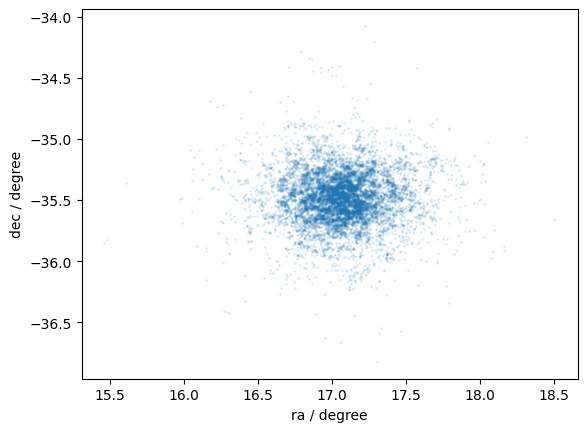

In [29]:
plt.scatter(observable.ra.values, observable.dec.values, alpha=0.1, s=1)
plt.xlabel("ra / degree")
plt.ylabel("dec / degree")

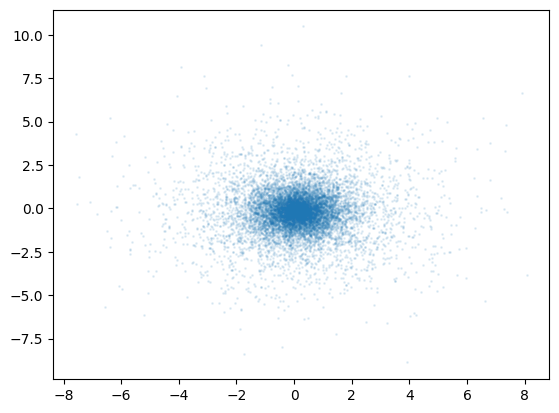

In [30]:
plt.scatter(observable.mura.values, observable.mudec.values, alpha=0.1, s=1)

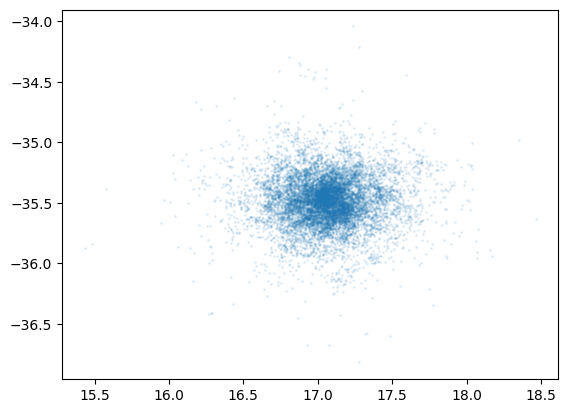

In [31]:
dd = 5
plt.scatter(observable.ra.values + np.random.normal(0, 0.02, len(observable)),
            observable.dec.values + np.random.normal(0, 0.02, len(observable)), alpha=0.1, s=1)

Text(0, 0.5, 'G')

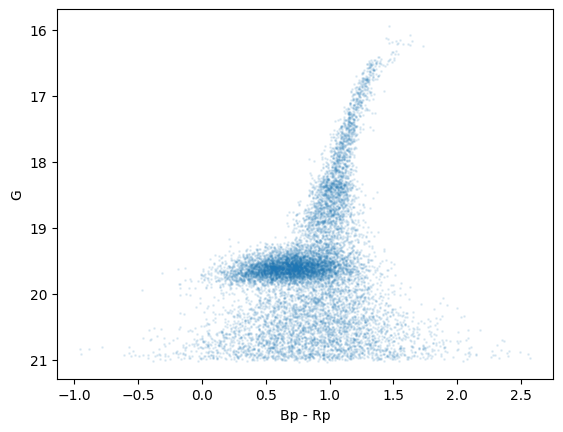

In [32]:
plt.scatter(observable.gaia__dr2_gbp.values - observable.gaia__dr2_grp.values, observable.gaia__dr2_g.values, s=1, alpha=0.1)
plt.gca().invert_yaxis()
plt.xlabel("Bp - Rp")
plt.ylabel("G")

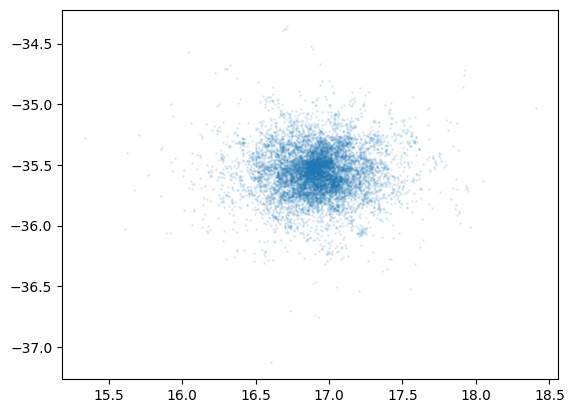

In [33]:

plt.scatter(icrs.ra + np.random.normal(0, 0.02, len(icrs))*u.degree, icrs.dec + np.random.normal(0, 0.02, len(icrs))*u.degree, s=1, alpha=0.1)

In [ ]:
icrs.ra